In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt

# Training network on MNIST

Firstly, I trained mnist_conv1 model for 5 epoch until validation and training accuracy of 98% was achieved

Then the weights from the trained model were used to compute the hidden layer outputs, which are needed for PCA

In [2]:
mnist = input_data.read_data_sets('./MNIST_data', one_hot=True)
sess = tf.InteractiveSession()
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

# Convolutional layer
x_image = tf.reshape(x, [-1,28,28,1])
W_conv = tf.Variable(tf.truncated_normal([5, 5, 1, 30], stddev=0.1))
b_conv = tf.Variable(tf.constant(0.1, shape=[30]))
h_conv = tf.nn.conv2d(x_image, W_conv, strides=[1, 1, 1, 1], \
                      padding='VALID')
h_relu = tf.nn.relu(h_conv + b_conv)
h_pool = tf.nn.max_pool(h_relu, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], \
                        padding='SAME')

# Fully-connected layer
W_fc1 = tf.Variable(tf.truncated_normal([12 * 12 * 30, 500], stddev=0.1))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[500]))
h_pool_flat = tf.reshape(h_pool, [-1, 12*12*30])
h_fc1 = tf.nn.relu(tf.matmul(h_pool_flat, W_fc1) + b_fc1)

# Output layer
W_fc2 = tf.Variable(tf.truncated_normal([500, 10], stddev=0.1))
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10]))
y_hat=tf.nn.softmax(tf.matmul(h_fc1, W_fc2) + b_fc2)

# Train and Evaluate the Model
cross_entropy = - tf.reduce_sum(y_*tf.log(y_hat))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_hat,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess.run(tf.global_variables_initializer())
print("=================================")
print("|Epoch\tBatch\t|Train\t|Val\t|")
print("|===============================|")
for j in range(5):
    for i in range(550):
        batch = mnist.train.next_batch(100)
        train_step.run(feed_dict={x: batch[0], y_: batch[1]})
        if i%50 == 49:
            train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1]})
            val_accuracy = accuracy.eval(feed_dict=\
                {x: mnist.validation.images, y_:mnist.validation.labels})
            print("|%d\t|%d\t|%.4f\t|%.4f\t|"%(j+1, i+1, train_accuracy, val_accuracy))
print("|===============================|")
test_accuracy = accuracy.eval(feed_dict=\
    {x: mnist.test.images, y_:mnist.test.labels})
print("test accuracy=%.4f"%(test_accuracy))

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz
|Epoch	Batch	|Train	|Val	|
|===============================|
|1	|50	|0.7800	|0.7724	|
|1	|100	|0.8000	|0.8566	|
|1	|150	|0.8800	|0.8890	|
|1	|200	|0.8900	|0.9082	|
|1	|250	|0.9200	|0.9032	|
|1	|300	|0.9300	|0.9198	|
|1	|350	|0.9300	|0.9256	|
|1	|400	|0.8800	|0.9334	|
|1	|450	|0.9000	|0.9336	|
|1	|500	|0.9100	|0.9408	|
|1	|550	|0.9300	|0.9422	|
|2	|50	|0.9500	|0.9472	|
|2	|100	|0.9900	|0.9538	|
|2	|150	|0.9500	|0.9436	|
|2	|200	|0.9400	|0.9520	|
|2	|250	|0.9500	|0.9562	|
|2	|300	|0.9200	|0.9574	|
|2	|350	|1.0000	|0.9594	|
|2	|400	|0.960

# Perform PCA for the encoding of test dataset

In [3]:
psi = h_fc1.eval(feed_dict={x: mnist.test.images, y_:mnist.test.labels})

In [4]:
phi = psi - np.mean(psi, axis=0)
W, s_2, W_T = np.linalg.svd(np.matmul(np.transpose(phi), phi), \
                                                full_matrices=True)

In [5]:
Z = np.matmul(phi, W)

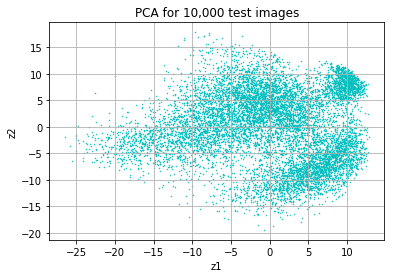

In [6]:
plt.title("PCA for 10,000 test images")
plt.xlabel('z1')
plt.scatter(Z[:,0],Z[:,1], c='c', edgecolor='c', marker='.', s=1)#, label='label 0')
#plt.axis([-8,8,-8,8])
plt.ylabel('z2')
#plt.legend(loc='best')
plt.grid(True)
plt.show()

## Filter out 100 test images, 10 per each label

In [7]:
mnist = input_data.read_data_sets('./MNIST_data', one_hot=False)
test_i = []
test_l = []
for i in range(10):
    test_l += [mnist.test.labels[np.where(mnist.test.labels == i)][:10]]
    test_i += [mnist.test.images[np.where(mnist.test.labels == i)][:10]]
    
test_i = np.reshape(np.array(test_i), (-1, mnist.test.images.shape[-1]))
test_lab = np.reshape(np.array(test_l), (-1,))
test_l = np.eye(10)[test_lab]
mnist = input_data.read_data_sets('./MNIST_data', one_hot=True)

Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz


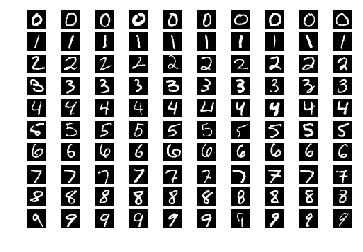

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3
 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7
 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9]


In [8]:
for i in range(10):
    for j in range(10):
        img=test_i[i*10+j]
        img.shape=(28,28)
        plt.subplot(10,10,i*10+j+1)
        plt.imshow(img,cmap='gray')
        plt.axis('off')
plt.savefig('mnist_train_images.png',dpi=300,bbox_inches='tight')
plt.show()
print(test_lab)

# Perform PCA for the encoding of 100 test images

In [9]:
omega = h_fc1.eval(feed_dict={x: test_i, y_:test_l})
omega = omega - np.mean(psi, axis=0)
Q = np.matmul(omega, W)

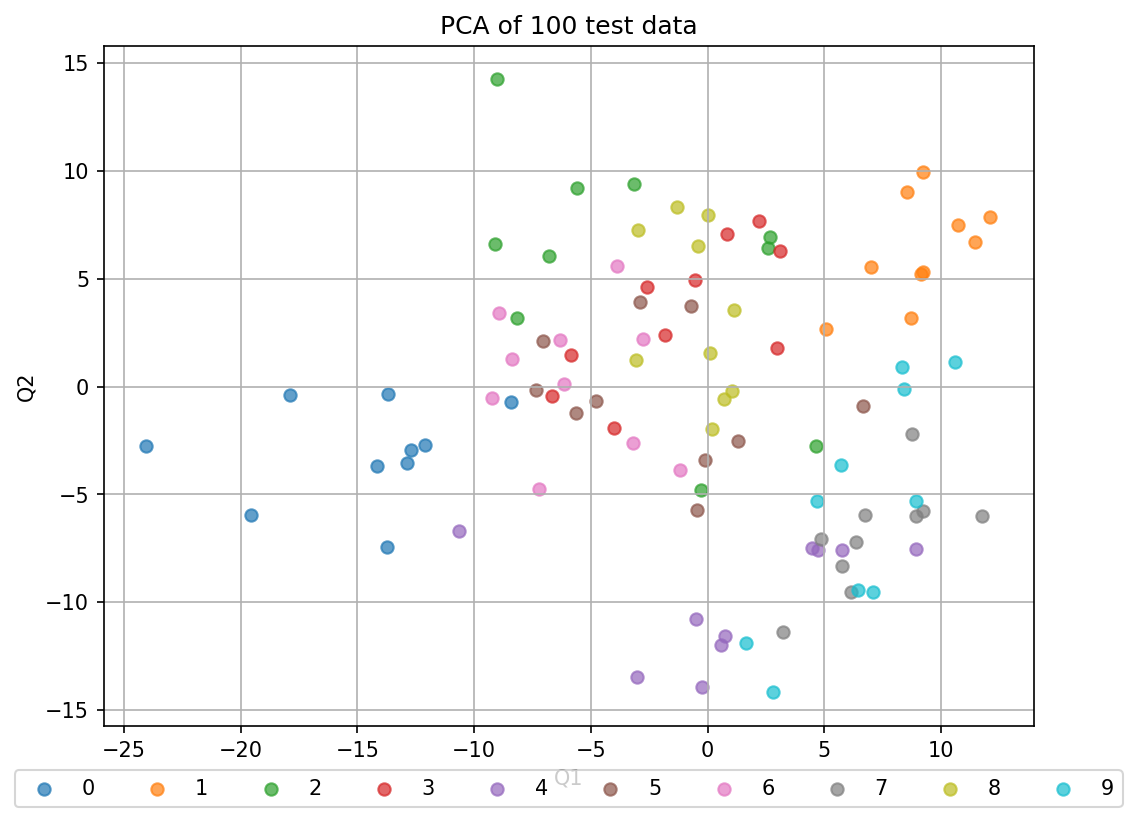

In [10]:
fig = plt.figure(num=None, figsize=(8, 6), dpi=150, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(111)
plt.title("PCA of 100 test data")
plt.xlabel('Q1')
plt.grid(True)
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', \
          'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', \
          'tab:olive', 'tab:cyan']

for i in range(10):
    plt.scatter(Q[i*10:(i+1)*10,0],Q[i*10:(i+1)*10,1], c=colors[i], s=35, label='%d'%i, alpha=0.7)
#plt.axis([-8,8,-8,8])
plt.ylabel('Q2')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, ncol=10)

plt.show()

In [11]:
from matplotlib.image import BboxImage
from matplotlib.transforms import Bbox, TransformedBbox

In [12]:
print(max(Q[:,0]), min(Q[:,0]))
print(max(Q[:,1]), min(Q[:,1]))

(12.106079, -24.054754)
(14.248778, -14.159325)


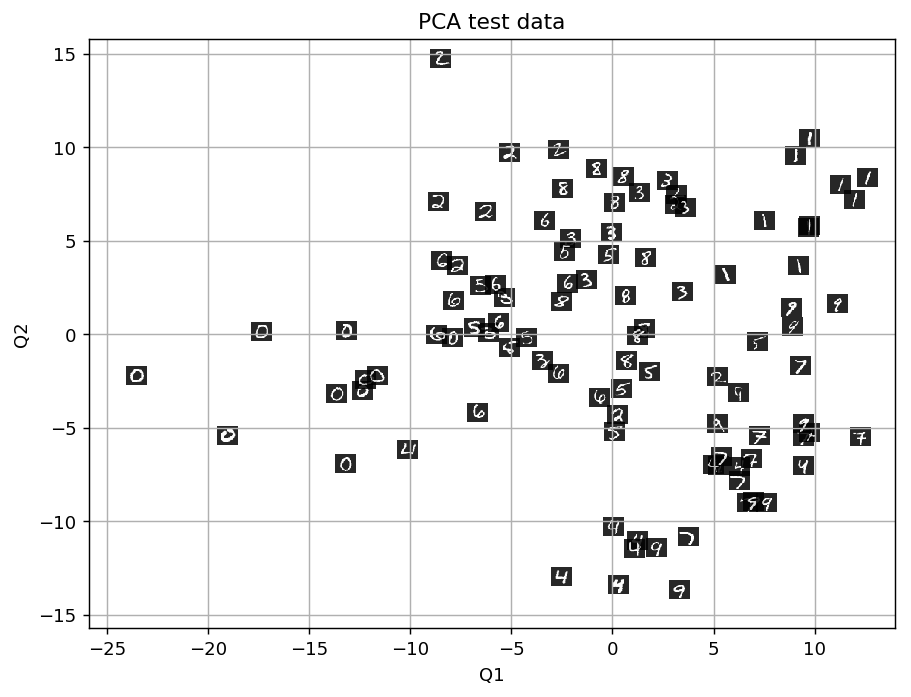

In [13]:
fig = plt.figure(num=None, figsize=(8, 6), dpi=130, facecolor='w', edgecolor='k')
ax2 = fig.add_subplot(111)
plt.title("PCA test data")
plt.xlabel('Q1')
plt.grid(True)
for i in range(10):
    for j in range(10):
        img=test_i[i*10+j]
        img.shape=(28,28)        
        bb = Bbox.from_bounds(Q[i*10+j,0],Q[i*10+j,1],1,1)  
        bb2 = TransformedBbox(bb,ax2.transData)
        bbox_image = BboxImage(bb2,
                            norm = None,
                            origin=None,
                            clip_on=False, cmap='gray', alpha=0.85)

        bbox_image.set_data(img)
        ax2.add_artist(bbox_image)
plt.axis([-8,8,-8,8])
plt.ylabel('Q2')
# Set the x and y limits
ax2.set_xlim(ax1.get_xlim())
ax2.set_ylim(ax1.get_ylim())

plt.show()

# Analysis of PCA results 

PCA is used for projecting a high dimensional dataset into smaller subspace into the directions that maximize the variance in the dataset.

From the images above we can see in the projected space that MNIST classifier tried to cluster the image space, such that most similar digits are grouped together.

However, the main weakness of PCA is that it relies on the linear assumption. But if the data is not linearly correlated (e.g. in spiral, where x=t*cos(t) and y =t*sin(t) ), PCA is not enough.

So in the image above not all digits are well grouped, those which have some similarities but belong to different classes are located closely. For instance digits "1" are separated from other classes, but for instance "0" and "6" and sometimes "2" are highly overlapping, as well as "8" and "3"; "9" and "7". Since the classification accuracy on the test dataset is 98% it means that most of the times all digits are well disentangled, hence we can make a conclusion that PCA and linear assumption about the correlation are not amazingly good for finding clusters in low dimensinal space, because this classifier is a non-trivial high-dimensional structure, and these sorts of linear projections just aren’t going to cut it.